In [1]:
import numpy as np 
#aqui estoy importando la libreria de numpy
import pandas as pd
#aqui estoy importando la libreria de pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.DataFrame(np.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#creo la variable df para poder verla luego, esta variale incluye lo siguiente
#llama un Dataframe con panda, con los datos del proyecto_training_data que se carga con numpy, adentro del dataframe coloco una coma y pongo columns 
#para darle nombre a las columnas 
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [3]:
filas , columnas = df.shape
print(filas) #tomar en cuenta el index empieza en 0 por eso marca 1459, en vez de 1460
print(columnas)

1460
6


In [4]:
#usare shuffle para poder colocar los datos de forma aleatoria
np.random.shuffle(df.values)
#voy a separar los datos en 80% de entrenamiento y el 20% de validacion
Cantidad_filas_Entrenamiento =int(0.8*len(df))
#necesito hacer dos subconjuntos, usare iloc
set_Entrenamiento = df.iloc[:Cantidad_filas_Entrenamiento]
set_validacion = df.iloc[Cantidad_filas_Entrenamiento:]

print(set_Entrenamiento)
print('--------')
print(set_validacion)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      129500.0          5.0    1040.0           5.0     1965.0         70.0
1      190000.0          6.0    1844.0           7.0     1977.0        105.0
2      115000.0          6.0    1166.0           6.0     1936.0         51.0
3      235000.0          8.0    1625.0           5.0     2006.0         44.0
4      336000.0          8.0    1276.0           8.0     1998.0         98.0
...         ...          ...       ...           ...        ...          ...
1163   173500.0          6.0     738.0           7.0     2005.0         64.0
1164   412500.0          9.0    1572.0          10.0     2003.0        110.0
1165   219500.0          7.0     847.0           8.0     2003.0         65.0
1166   248000.0          7.0     979.0           7.0     1994.0          NaN
1167   154000.0          7.0     764.0           6.0     2003.0         36.0

[1168 rows x 6 columns]
--------
      SalePrice  OverallQual  1stFlrSF  To

In [5]:
def getDFDataTypes(df):
    continuas = []
    discretas  = []
    categoricas = [] 
    for col in df.columns.values:
        if((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
            cantidad = len(df[col].value_counts())
            if(cantidad >= 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas
continuas, discretas, categoricas = getDFDataTypes(df)
print('continuas:',continuas)
print('discretas:',discretas)
print('categoricas:',categoricas)

continuas: ['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']
discretas: ['OverallQual', 'TotRmsAbvGrd']
categoricas: []


### Analisis Exploratorio de datos para cada variable.

In [6]:
#sacando datos para la primera variable, 
col1 = set_Entrenamiento.to_numpy()[:,0]
Sale_Price_media = np.round((np.mean(col1)),2)
Sale_Price_Max = np.max(col1)
Sale_Price_Min = np.min(col1)
Sale_Price_Rango = np.ptp(col1)
Sale_Price_Desves = np.round((np.std(col1)),2)
Exploracion_Precio = [Sale_Price_media,Sale_Price_Max,Sale_Price_Min,Sale_Price_Rango,Sale_Price_Desves]
Exploracion_Precio

[180941.93, 755000.0, 34900.0, 720100.0, 79215.0]

In [7]:
#Exploracion segunda variable, 
col2 = set_Entrenamiento.to_numpy()[:,1]
Overall_media = np.round((np.mean(col2)),2)
Overall_Max = np.max(col2)
Overall_Min = np.min(col2)
Overall_Rango = np.ptp(col2)
Overall_Desves = np.round((np.std(col2)),2)
Exploracion_Overall = [Overall_media,Overall_Max,Overall_Min,Overall_Rango,Overall_Desves]



In [8]:
#Exploracion tercera variable, 
col3 = set_Entrenamiento.to_numpy()[:,2]
firstfloor_media = np.round((np.mean(col3)),2)
firstfloor_Max = np.max(col3)
firstfloor_Min = np.min(col3)
firstfloor_Rango = np.ptp(col3)
firstfloor_Desves = np.round((np.std(col3)),2)
Exploracion_firstfloor = [firstfloor_media,firstfloor_Max,firstfloor_Min,firstfloor_Rango,firstfloor_Desves]

In [9]:
#Exploracion cuarta variable, 
col4 = set_Entrenamiento.to_numpy()[:,3]
Rooms_media = np.round((np.mean(col4)),2)
Rooms_Max = np.max(col4)
Rooms_Min = np.min(col4)
Rooms_Rango = np.ptp(col4)
Rooms_Desves = np.round((np.std(col4)),2)
Exploracion_Rooms = [Rooms_media,Rooms_Max,Rooms_Min,Rooms_Rango,Rooms_Desves]

In [10]:
#Exploracion quinta variable, 
col5 = set_Entrenamiento.to_numpy()[:,4]
Year_media = np.round((np.mean(col5)),2)
Year_Max = np.max(col5)
Year_Min = np.min(col5)
Year_Rango = np.ptp(col5)
Year_Desves = np.round((np.std(col5)),2)
Exploracion_Year = [Year_media,Year_Max,Year_Min,Year_Rango,Year_Desves]

In [11]:
#Exploracion sexta variable, 
col6 = set_Entrenamiento.to_numpy()[:,5]
Frontage_media = np.round((np.nanmean(col6)),2)
Frontage_Max = np.nanmax(col6)
Frontage_Min = np.nanmin(col6)
Frontage_Rango = Frontage_Max-Frontage_Min #realice la resta ya que ptp no acepta datos nan
Frontage_Desves = np.round((np.nanstd(col6)),2)
Frontage_Overall = [Frontage_media,Frontage_Max,Frontage_Min,Frontage_Rango,Frontage_Desves]

In [12]:
#haciendo una tabla con los datos
Dato_Estadistico = ['Sales Price','Overall Quall','First Floor','Rooms','Year Build','Frontage']
Media = [Sale_Price_media,Overall_media,firstfloor_media,Rooms_media,Year_media,Frontage_media]
Maximo = [Sale_Price_Max,Overall_Max,firstfloor_Max,Rooms_Max,Year_Max,Frontage_Max]
Minimo = [Sale_Price_Min,Overall_Min,firstfloor_Min,Rooms_Min,Year_Min,Frontage_Min]
Rango = [Sale_Price_Rango,Overall_Rango,firstfloor_Rango,Rooms_Rango,Year_Rango,Frontage_Rango]
Desviacion = [Sale_Price_Desves,Overall_Desves,firstfloor_Desves,Rooms_Desves,Year_Desves,Frontage_Desves]


In [13]:
Tabla_Exploracion = { 'Datos': Dato_Estadistico,
         'Medias': pd.Series( Media),
         'Maximos': pd.Series(Maximo),
         'Minimos':pd.Series(Minimo),
         'Rango':pd.Series(Rango),
         'Desviacion Estandar':pd.Series(Desviacion),
     }
df1 = pd.DataFrame(Tabla_Exploracion)
df1

,Datos,Medias,Maximos,Minimos,Rango,Desviacion Estandar
0,Sales Price,180941.93,755000.0,34900.0,720100.0,79215.00
1,Overall Quall,6.11,10.0,1.0,9.0,1.39
2,First Floor,1159.59,4692.0,334.0,4358.0,391.89
3,Rooms,6.55,12.0,2.0,10.0,1.64
4,Year Build,1971.23,2010.0,1872.0,138.0,30.12
5,Frontage,70.13,313.0,21.0,292.0,25.15


### 4. Histograma  para cada variable  del Dataset

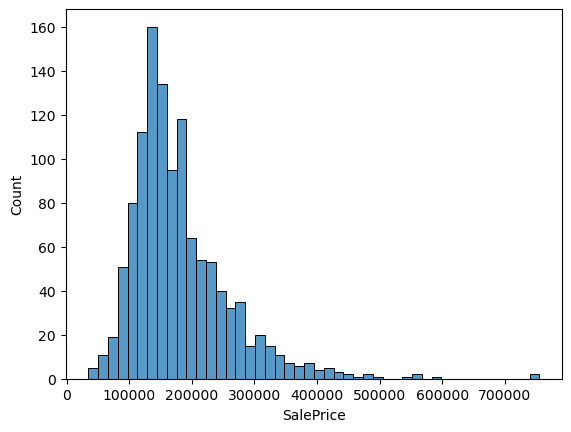

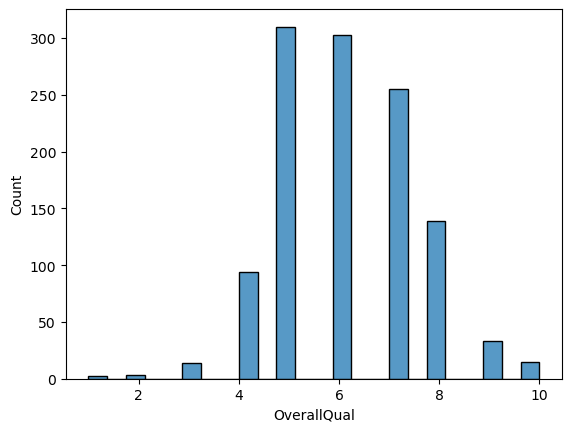

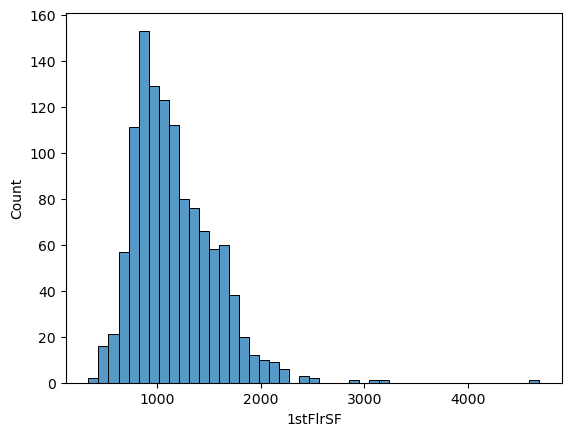

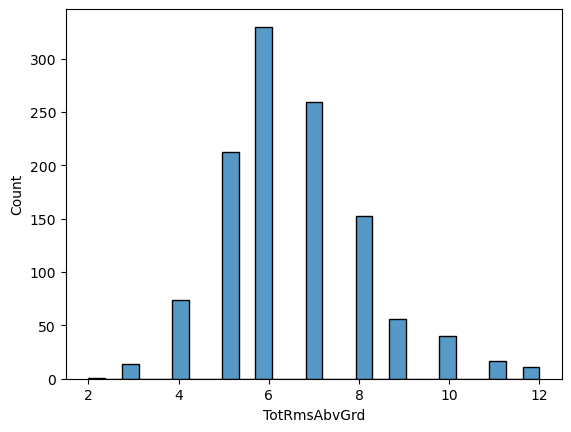

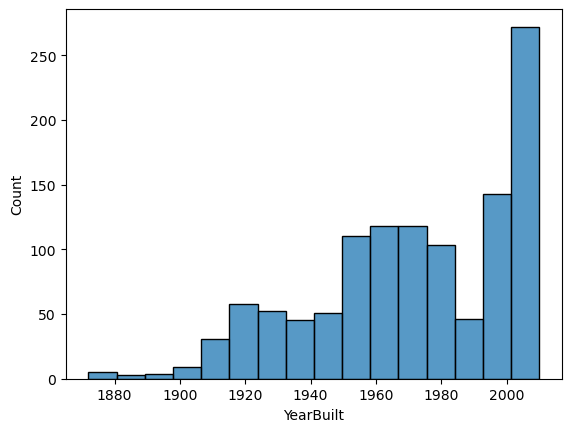

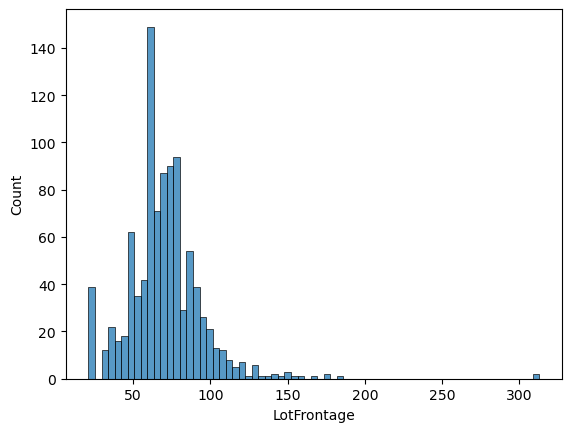

In [14]:
for variables in set_Entrenamiento.columns:
    sns.histplot(set_Entrenamiento[variables].dropna())
    #use Histplot ya que el programa me mostraba un mensaje que distplot dejaria de utilizarse
    #por lo cual pedia cambiar a histplot o displot 
    plt.show()


### 5. Para cada variable independiente X calcular"

#### Coeficiente de correlacion entre x y y 

In [15]:
#Coeficiente de correlacion con primera variable 
print(set_Entrenamiento.columns)
correlacion1 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["OverallQual"])
correlacion2 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["1stFlrSF"])
correlacion3 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["TotRmsAbvGrd"])
correlacion4 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["YearBuilt"])
correlacion5 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["LotFrontage"])

Tabla_Correlaciones = { 'Variable': ("OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"),
         'Correlacion': (correlacion1,correlacion2,correlacion3,correlacion4,correlacion5),
     }
df2 = pd.DataFrame(Tabla_Correlaciones)
df2


Index(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt',
       'LotFrontage'],
      dtype='object')


,Variable,Correlacion
0,OverallQual,0.793551
1,1stFlrSF,0.590645
2,TotRmsAbvGrd,0.540782
3,YearBuilt,0.513149
4,LotFrontage,0.361896


#### Graficos para cada relacion

Text(0.5, 1.0, 'Sale_Price vs LotFrontage con una Correlacion de:0.36189592100560247')

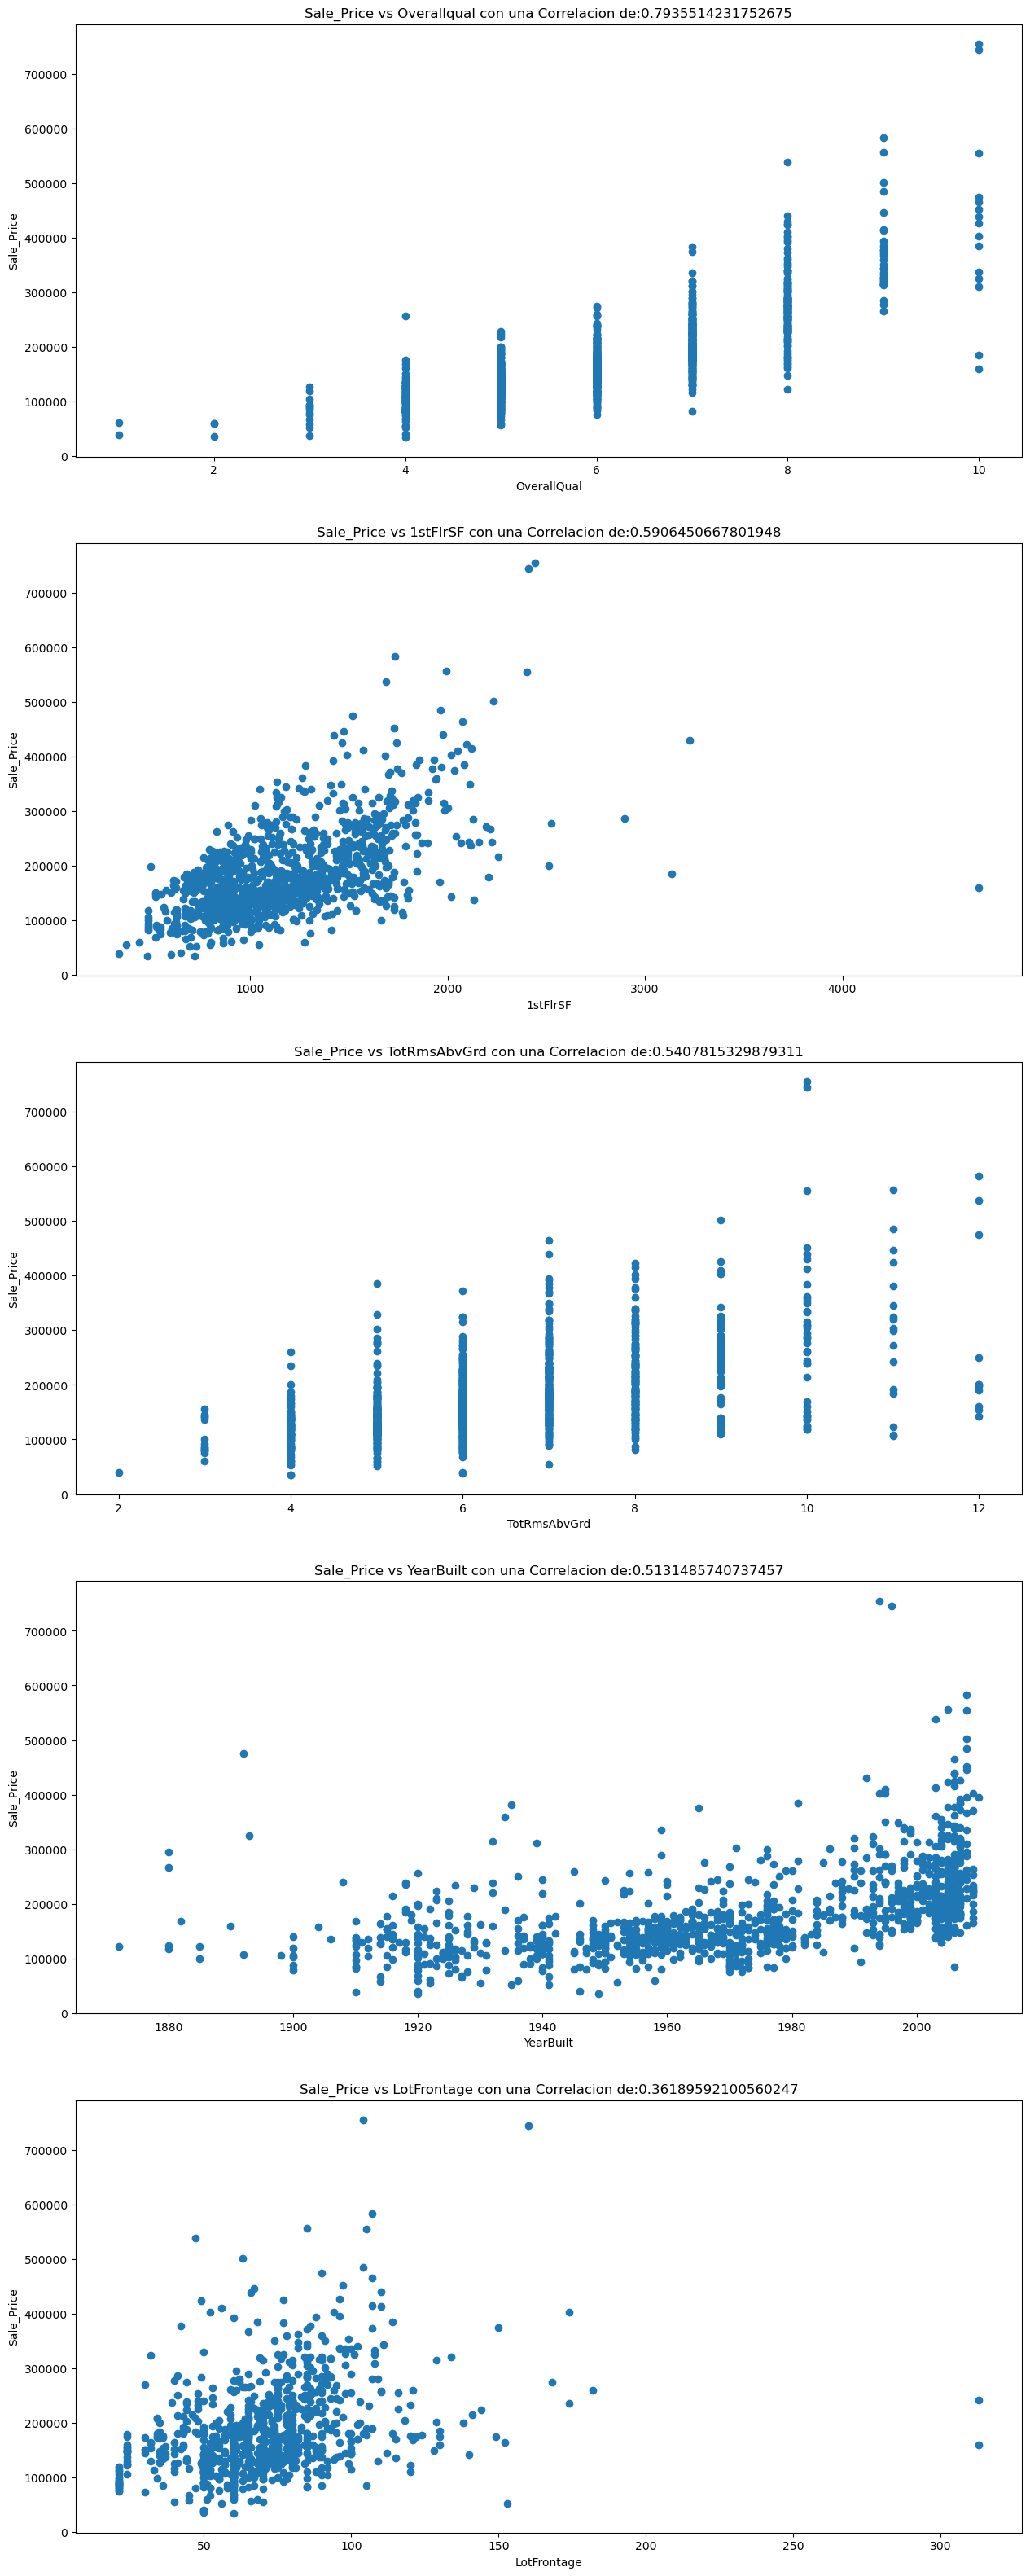

In [16]:
#al intentar hacerlo en una grafica se superponen los datos por lo cual 
#voy a usar subplots 

fig, sca =plt.subplots(5,1, figsize =(15,40))
sca[0].scatter(set_Entrenamiento["OverallQual"],set_Entrenamiento["SalePrice"])
sca[1].scatter(set_Entrenamiento["1stFlrSF"],set_Entrenamiento["SalePrice"])
sca[2].scatter(set_Entrenamiento["TotRmsAbvGrd"],set_Entrenamiento["SalePrice"])
sca[3].scatter(set_Entrenamiento["YearBuilt"],set_Entrenamiento["SalePrice"])
sca[4].scatter(set_Entrenamiento["LotFrontage"],set_Entrenamiento["SalePrice"])
#PARA PODER COLOCAR TITULO Y EJES:
sca[0].set_xlabel('OverallQual')
sca[0].set_ylabel('Sale_Price')
sca[0].set_title('Sale_Price vs Overallqual con una Correlacion de:'+ str(correlacion1))

sca[1].set_xlabel('1stFlrSF')
sca[1].set_ylabel('Sale_Price')
sca[1].set_title('Sale_Price vs 1stFlrSF con una Correlacion de:'+ str(correlacion2))

sca[2].set_xlabel('TotRmsAbvGrd')
sca[2].set_ylabel('Sale_Price')
sca[2].set_title('Sale_Price vs TotRmsAbvGrd con una Correlacion de:' +str(correlacion3))

sca[3].set_xlabel('YearBuilt')
sca[3].set_ylabel('Sale_Price')
sca[3].set_title('Sale_Price vs YearBuilt con una Correlacion de:' +str(correlacion4))

sca[4].set_xlabel('LotFrontage')
sca[4].set_ylabel('Sale_Price')
sca[4].set_title('Sale_Price vs LotFrontage con una Correlacion de:' +str(correlacion5)) #los concateno ya que el set_title solo admite candea y por eso paso correlacion a str

### escogiendo variables
#### las variables elegidas para el analisis son overallQual y 1stflrsf

In [17]:
#haciendo diccionario de correlaciones
correlaciones_dic = {"OverallQuall": correlacion1, "1stFlrSF": correlacion2, "TotRmsAbvGrd": correlacion3, "YearBuilt": correlacion4, "LotFrontage": correlacion5}
# Ordenamos los elementos del diccionario según sus valores en orden descendente
correlaciones_dic_ordenada = sorted(correlaciones_dic.items(), key=lambda x: x[1], reverse=True)
# Tomamos los dos últimos elementos de la lista, que son los dos valores más grandes
variable1, valor1 = correlaciones_dic_ordenada[0]
variable2, valor2 = correlaciones_dic_ordenada[1]
print(variable1, valor1) 
print(variable2, valor2)  

OverallQuall 0.7935514231752675
1stFlrSF 0.5906450667801948


## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.


In [18]:
def regresion_lineal (x,y,epoch,imprimir_error,alpha):
    modelos = []
    errores = []
    n = len(x)
    x = np.array([x,np.ones(len(x))])
    betas = np.array([0,0])

    for i in range(epoch):
        y_calcu = np.dot(betas,x)
        error = ((1 / (2 * n)) * np.sum(np.square(y - y_calcu)))
        errores.append(error)
        modelos.append({ i : betas})
        betagrad = (1 / n ) * np.dot((y_calcu - y), x.T)
        betas = betas - (alpha * betagrad)
        if (i % imprimir_error == 0):
            print(f'Epoch: {i}, Error: {error}')

    return modelos, errores


In [49]:
def display_error (errores2):
    plt.clf()
    plt.plot(errores2)
    plt.xlabel('Iteraciones')
    plt.ylabel('Errores')
    plt.title('Errores vs iteraciones')  
    plt.show() 

In [20]:
def recta_data (modelos,n,x,y):
    n_modelos = modelos[::n]
    betas_modelos = [list(d.values())[0] for d in n_modelos]
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel('variable independiente')
    plt.ylabel('SalePrice')
    plt.title('independiente vs salePrice') 
    for modelo in betas_modelos:
        x_vals = np.linspace(min(x),max(x),1000)
        y_vals = modelo[0] * x_vals + modelo[1]
        plt.plot(x_vals, y_vals)
    plt.show()

## Entrenando modelo utilizando la variable OverallQual

Epoch: 0, Error: 19507498726.953766
Epoch: 10, Error: 18106023296.39211
Epoch: 20, Error: 16813078226.63217
Epoch: 30, Error: 15620258776.354885
Epoch: 40, Error: 14519811079.052576
Epoch: 50, Error: 13504581738.38182
Epoch: 60, Error: 12567971326.922083
Epoch: 70, Error: 11703891486.054867
Epoch: 80, Error: 10906725348.087673
Epoch: 90, Error: 10171291023.343502
Epoch: 100, Error: 9492807914.860733
Epoch: 110, Error: 8866865641.729305
Epoch: 120, Error: 8289395369.0468025
Epoch: 130, Error: 7756643358.122451
Epoch: 140, Error: 7265146564.98997
Epoch: 150, Error: 6811710128.605401
Epoch: 160, Error: 6393386602.390046
Epoch: 170, Error: 6007456794.111539
Epoch: 180, Error: 5651412089.5510435
Epoch: 190, Error: 5322938145.050162
Epoch: 200, Error: 5019899842.929591
Epoch: 210, Error: 4740327411.981017
Epoch: 220, Error: 4482403622.807324
Epoch: 230, Error: 4244451974.773429
Epoch: 240, Error: 4024925797.7759657
Epoch: 250, Error: 3822398197.9870706
Epoch: 260, Error: 3635552782.2136526
E

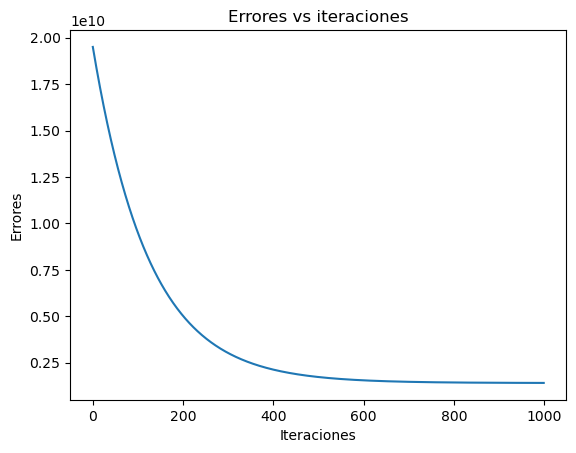

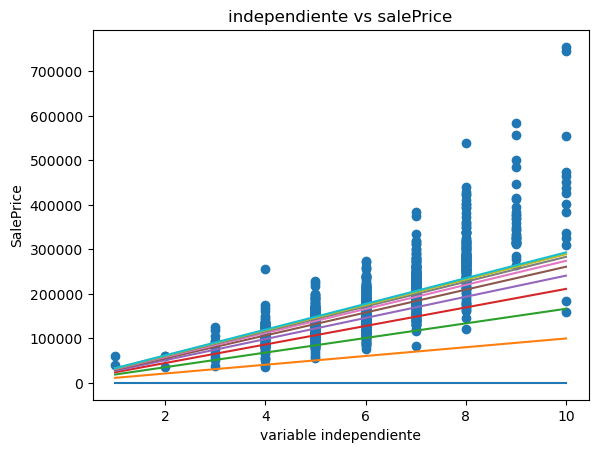

In [21]:
modelos_overallQual, errores_overallQual = regresion_lineal(set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'], 1000, 10, 0.0001)
display_error(errores_overallQual)
recta_data(modelos_overallQual,100,set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'])

## Entrenamiento para la variable independiente 1stFlrSF

Epoch: 0, Error: 19507498726.953766
Epoch: 10, Error: 2811677008.221882
Epoch: 20, Error: 2161838147.9173408
Epoch: 30, Error: 2136544943.1778038
Epoch: 40, Error: 2135560456.6593087
Epoch: 50, Error: 2135522119.9959717
Epoch: 60, Error: 2135520609.6078975
Epoch: 70, Error: 2135520532.581088
Epoch: 80, Error: 2135520511.3439188
Epoch: 90, Error: 2135520492.2782116


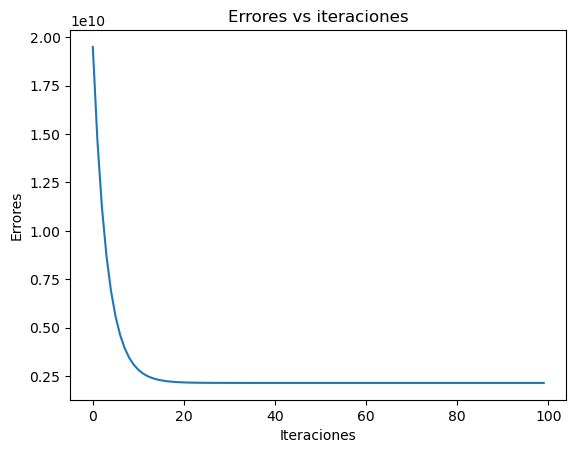

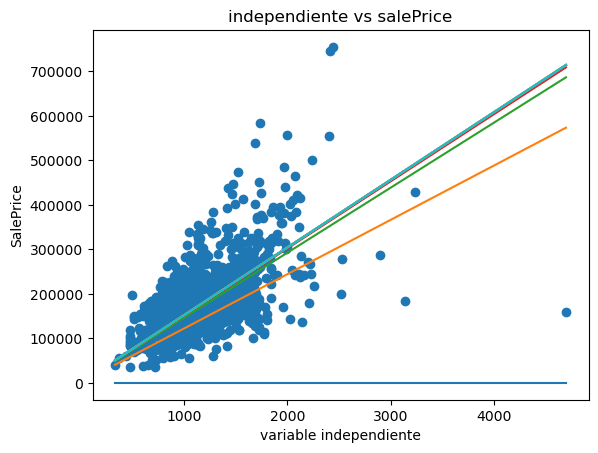

In [22]:
modelos_1stFlrSF, errores_1stFlrSF = regresion_lineal(set_Entrenamiento['1stFlrSF'], set_Entrenamiento['SalePrice'], 100, 10, 0.0000001)
display_error(errores_1stFlrSF)
recta_data(modelos_1stFlrSF, 10, set_Entrenamiento['1stFlrSF'], set_Entrenamiento['SalePrice'])

## instalando scikit-learn

In [23]:
!pip install -U scikit-learn

In [24]:
import sklearn.linear_model as sklm

### Realizando las dos regresiones utilizando SKLEARN

In [25]:
#set_Entrenamiento['1stFlrSF']
#set_Entrenamiento['OverallQual']
regresionx1 = sklm.LinearRegression().fit(set_Entrenamiento['OverallQual'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)
regresionx2 = sklm.LinearRegression().fit(set_Entrenamiento['1stFlrSF'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)

In [26]:
def comparacion_modelos(modelo_manual, modelo_scikit, x):
    predicciones_modelo_manual = modelo_manual[0] * x + modelo_manual[1]
    predicciones_modelo_scikit = modelo_scikit.predict(x.values.reshape(-1,1))
    predicciones_promedio = (predicciones_modelo_manual + predicciones_modelo_scikit) / 2
    return predicciones_modelo_manual, predicciones_modelo_scikit, predicciones_promedio

### Predicciones con el 20% de datos de prueba

#### Predicciones para la variable independiente OverallQual

In [41]:
#reseteando index de set validacion
set_validacion = set_validacion.reset_index(drop=True)

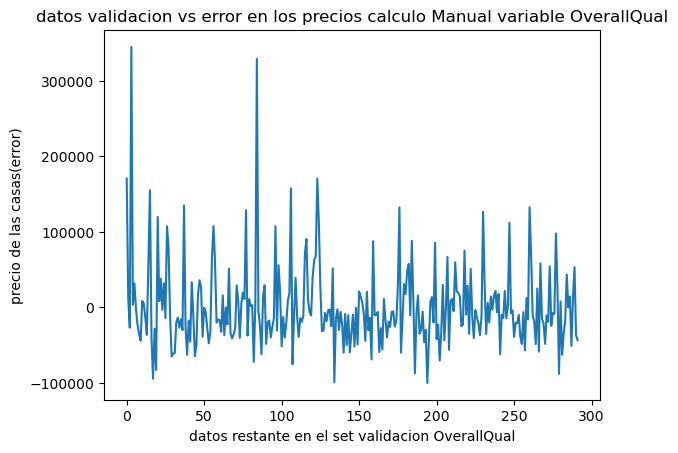

292


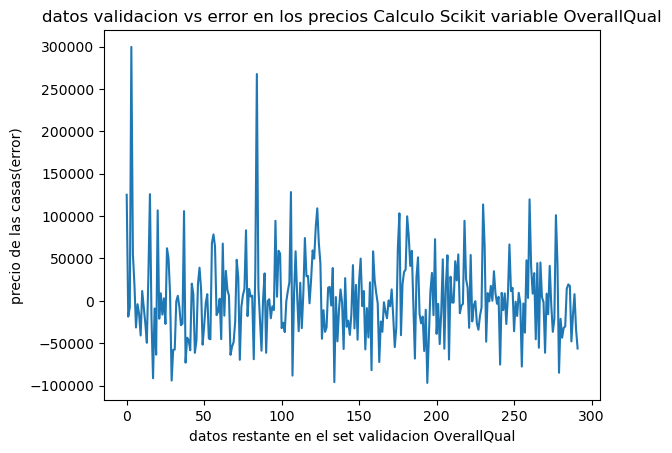

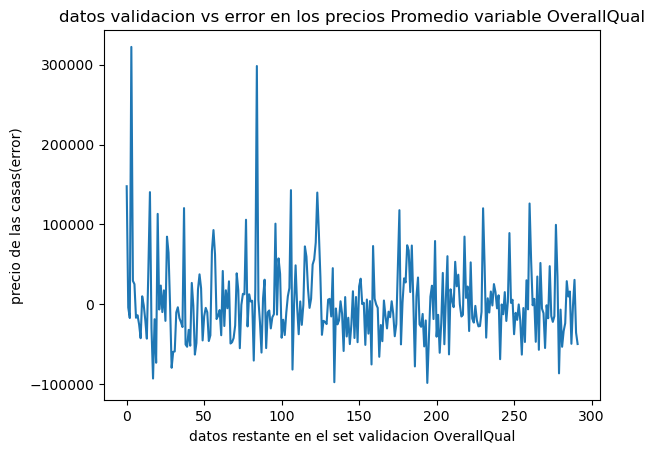

In [47]:
manual_overallQual, scikit_overallQual, promedio_overallQual = comparacion_modelos(list(modelos_overallQual[-1].values())[0], regresionx1, set_validacion['OverallQual'])

n = len(set_validacion['SalePrice'])
# se mostraran en una grafica los errores utilizando el modelo manual calculado anteriormente
arreglo_errores_manual_overallQual = set_validacion['SalePrice'] - manual_overallQual
plt.plot(arreglo_errores_manual_overallQual)
plt.xlabel('datos restante en el set validacion OverallQual')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios calculo Manual variable OverallQual')
plt.show()
print(n)
#se mostraran en una grafica los errores utilizando el modelo de scikit 
arreglo_errores_scikit_overallQual = set_validacion['SalePrice'] - scikit_overallQual
plt.plot(arreglo_errores_scikit_overallQual)
plt.xlabel('datos restante en el set validacion OverallQual')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios Calculo Scikit variable OverallQual')
plt.show()
#los errores promedios se muestran a continuacion en la siguiente grafica
arreglo_errores_promedio_overallQual = set_validacion['SalePrice'] - promedio_overallQual
plt.plot(arreglo_errores_promedio_overallQual)
plt.xlabel('datos restante en el set validacion OverallQual')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios Promedio variable OverallQual')
plt.show()

## Calculo de errores contra el set de validacion

In [45]:
error_manual_overallQual = abs(np.sum(set_validacion['SalePrice'] - manual_overallQual) / n)
error_scikit_overallQual = abs(np.sum(set_validacion['SalePrice'] - scikit_overallQual) / n)
error_promedio_overallQual = abs(np.sum(set_validacion['SalePrice'] - promedio_overallQual) / n)

print(error_manual_overallQual)
print(error_scikit_overallQual)
print(error_promedio_overallQual)

165.90998179943114
2614.62089155425
1390.2654366768468


## Predicciones para la variable independiente 1stFlrSF

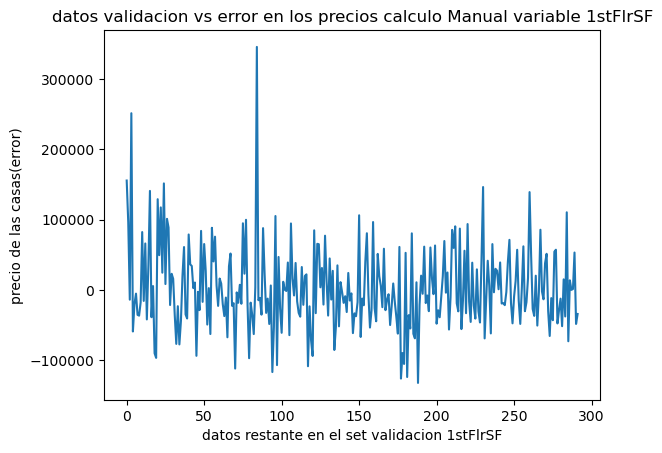

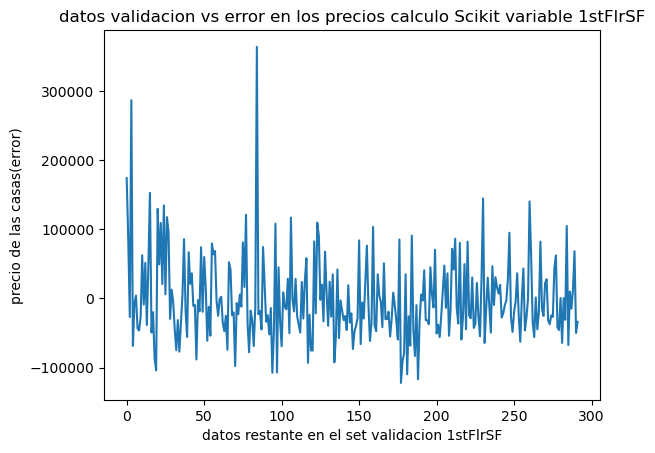

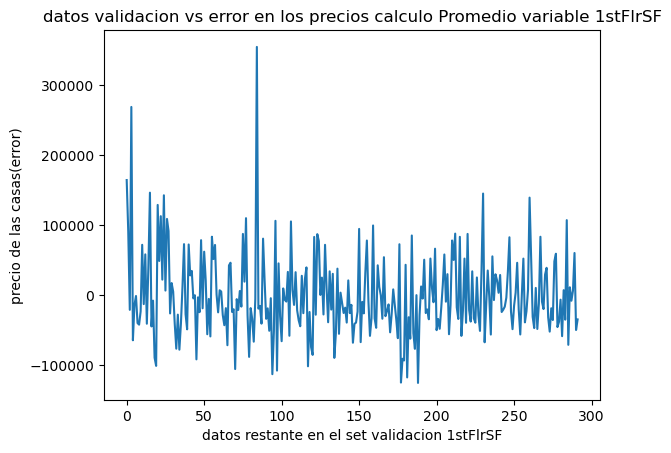

1937.826680682216
1918.5317626448993
9.647459018658544


In [48]:
manual_1stFlrSF, scikit_1stFlrSF, promedio_1stFlrSF = comparacion_modelos(list(modelos_1stFlrSF[-1].values())[0], regresionx2, set_validacion['1stFlrSF'])

n = len(set_validacion['SalePrice'])


arreglo_errores_manual_1stFlrSF = set_validacion['SalePrice'] - manual_1stFlrSF
plt.plot(arreglo_errores_manual_1stFlrSF)
plt.xlabel('datos restante en el set validacion 1stFlrSF')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios calculo Manual variable 1stFlrSF')
plt.show()
arreglo_errores_scikit_1stFlrSF = set_validacion['SalePrice'] - scikit_1stFlrSF
plt.plot(arreglo_errores_scikit_1stFlrSF)
plt.xlabel('datos restante en el set validacion 1stFlrSF')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios calculo Scikit variable 1stFlrSF')
plt.show()
arreglo_errores_promedio_1stFlrSF = set_validacion['SalePrice'] - promedio_1stFlrSF
plt.plot(arreglo_errores_promedio_1stFlrSF)
plt.xlabel('datos restante en el set validacion 1stFlrSF')
plt.ylabel('precio de las casas(error)')
plt.title('datos validacion vs error en los precios calculo Promedio variable 1stFlrSF')
plt.show()

error_manual_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - manual_1stFlrSF) / n)
error_scikit_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - scikit_1stFlrSF) / n)
error_promedio_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - promedio_1stFlrSF) / n)

print(error_manual_1stFlrSF)
print(error_scikit_1stFlrSF)
print(error_promedio_1stFlrSF)

# Conclusion:

## las variables independientes que se analizaron son las de Overquall y la de 1stFlrSF, las cuales teniann una mayor correlacion con la variable dependiente y de SalesPrice, Overquall contaba con una correlacion de 0.793551, lo cual es bastante alta y con ella se pueden predecir los datos de los precios de la casa, por lo cual podemos concluir que el precio de la casa, esta muy correlacionado a la calidad de los detalles que tenga, a un nivel mayor de detalles y mejor calidad de materiales el precio de la propiedad sera mayor 

## se concluye por medio de la validacion de los datos que para la primera variable Overquall, el modelo manual que se realizo contiene un menor error en la prediccion de los datos, en la variable 1stFlrSF encontramos que utilizando la libreria scikit se encuentra un menor error en el calculo de las predicciones. el cual la diferencia con el modelo manual es peque;a. por lo cual el uso de ambas es correcto. 